#### Task 3: To Explore Decision Tree Algorithm
Decision Tree algorithm belongs to Supervised Machine algorithm.In this task for the given ‘Iris’ dataset,we will create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

##### import necessary libraray

In [64]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##### importind Dataset and analysing it.

In [48]:
df = pd.read_csv('iris.csv',index_col=0)
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Data Visualizations

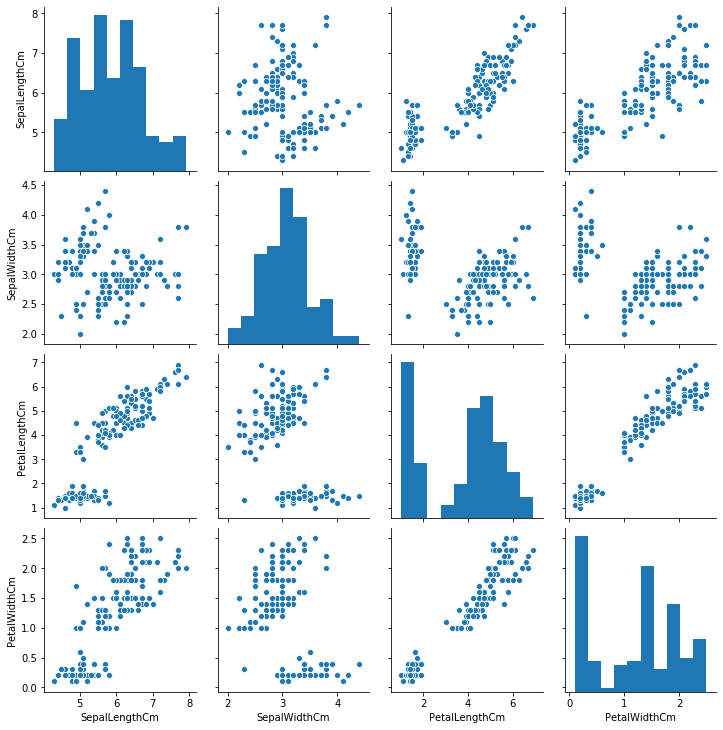

In [5]:
sns.pairplot(df)

##### prepare dataset for feeding 

In [55]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X = df.iloc[:-1,:-1]
y = df.iloc[:-1,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

clf = DecisionTreeClassifier(random_state=42)
cross_val_score(clf,X,y,cv=3)

array([0.98      , 0.94      , 0.95918367])

In [56]:
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

##### predicting the species

In [57]:
clf.predict([[i for i in df.iloc[-1,:-1].values]])

array(['Iris-virginica'], dtype=object)

##### Visualizing Tree

[Text(343.38461538461536, 757.1571428571428, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 111\nvalue = [35, 39, 37]\nclass = iris-versicolor'),
 Text(257.53846153846155, 640.6714285714286, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = iris-setosa'),
 Text(429.23076923076917, 640.6714285714286, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 76\nvalue = [0, 39, 37]\nclass = iris-versicolor'),
 Text(171.69230769230768, 524.1857142857143, 'petal width (cm) <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = iris-versicolor'),
 Text(85.84615384615384, 407.7, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = iris-versicolor'),
 Text(257.53846153846155, 407.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = iris-virginica'),
 Text(686.7692307692307, 524.1857142857143, 'petal width (cm) <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]\nclass = iris-virginica'),
 Text(429.23076923076917, 407.7, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\

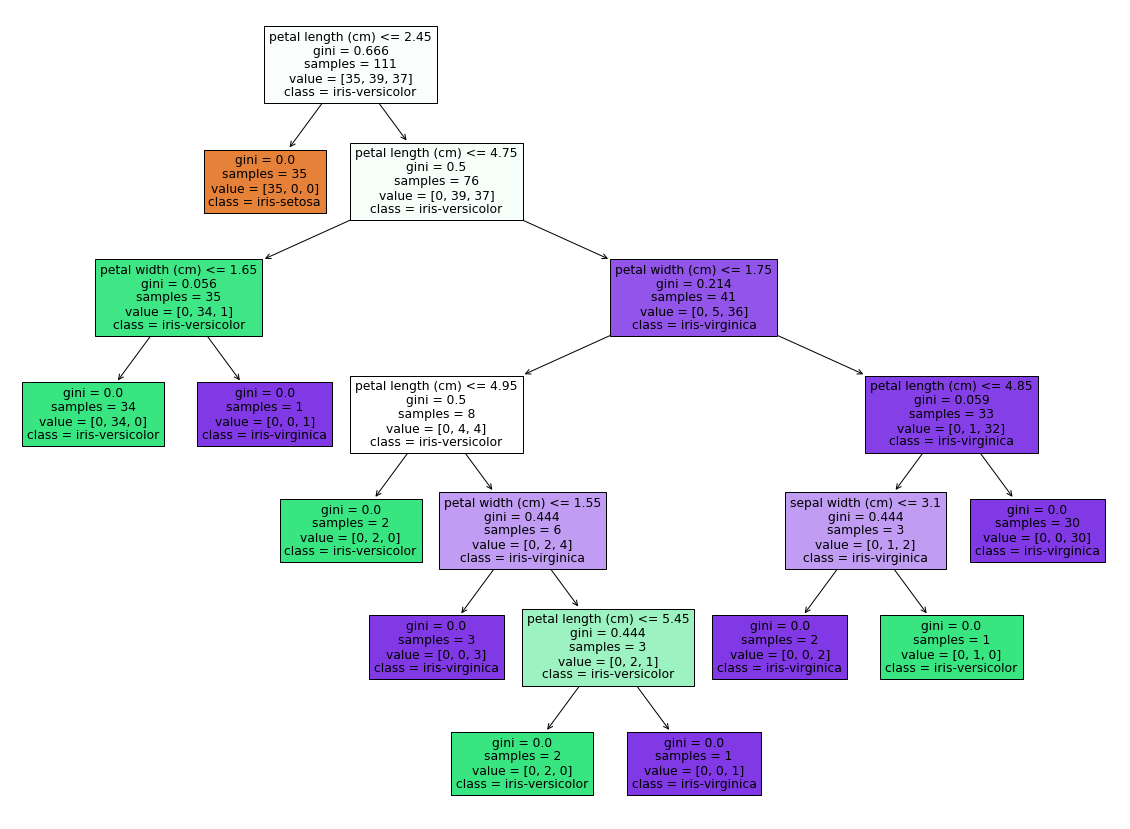

In [68]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['iris-setosa', 'iris-versicolor', 'iris-virginica']

fig = plt.figure(figsize=(20,15))
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True)